In [ ]:
import pathlib
import PIL.Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

dados_dir = pathlib.Path("uvas/")
len(list(dados_dir.glob("*/*.JPG"))) 
pastas = [pasta.name for pasta in dados_dir.iterdir() if pasta.is_dir()]    
blackMeasles = list(dados_dir.glob("BlackMeasles/*"))
print(pastas)

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']


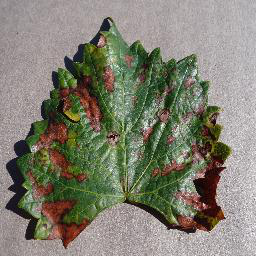

In [2]:
PIL.Image.open(str(blackMeasles[0]))

In [ ]:
for pasta in pastas:
    path = dados_dir / pasta  
    imagens = list(path.glob("*.JPG")) #+ list(path.glob("*.jpg"))
    print(f"Classes {pasta} tem {len(imagens)} imagens")
    if imagens:
        img = PIL.Image.open(imagens[0]) 
        img_array = np.array(img) 
        print(f"A primeira imagem em {pasta}: {img_array.shape}")
    else:
        print(f"Nenhuma imagem encontrada na classe {pasta}")

Classes BlackMeasles tem 400 imagens
A primeira imagem em BlackMeasles: (256, 256, 3)
Classes BlackRot tem 400 imagens
A primeira imagem em BlackRot: (256, 256, 3)
Classes HealthyGrapes tem 400 imagens
A primeira imagem em HealthyGrapes: (256, 256, 3)
Classes LeafBlight tem 400 imagens
A primeira imagem em LeafBlight: (256, 256, 3)


In [4]:
batch_size= 64
altura= 256
largura=256

In [5]:
treino = tf.keras.utils.image_dataset_from_directory(
    dados_dir,
    validation_split= 0.2,
    subset="training",
    seed = 568,
    image_size=(altura,largura),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [6]:
validacao = tf.keras.utils.image_dataset_from_directory(
    dados_dir,
    validation_split= 0.2,
    subset="validation",
    seed = 568,
    image_size=(altura,largura),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [7]:
treino.class_names
tf.random.set_seed(424242)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), 
    tf.keras.layers.Rescaling(1.255),  
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)    
])
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas = 10
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas
)

In [ ]:
modelo.summary()

In [ ]:
def plot_resultados(history, epocas):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    val_loss= history.history["val_loss"]
    intervalo_epocas= range(epocas)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(intervalo_epocas, acc, "r", label="Acurácia de Treino")
    plt.plot(intervalo_epocas, val_acc, "b", label="Acurácia de Validação")
    plt.legend(loc="lower right")
    plt.subplot(1,2,2)
    plt.plot(intervalo_epocas, acc, "r", label="Perda do Treino")
    plt.plot(intervalo_epocas, val_acc, "b", label="Perda da Validação")
    plt.legend(loc= "upper right")
    plt.show()

In [ ]:
plot_resultados(history, epocas)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), 
    tf.keras.layers.Rescaling(1.255),
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)    
])
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas = 10
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 646ms/step - accuracy: 0.2749 - loss: 2200.8276 - val_accuracy: 0.4250 - val_loss: 1.2085
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 652ms/step - accuracy: 0.6172 - loss: 0.9850 - val_accuracy: 0.5312 - val_loss: 1.1833
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 623ms/step - accuracy: 0.8666 - loss: 0.5771 - val_accuracy: 0.5719 - val_loss: 1.2010
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 620ms/step - accuracy: 0.9481 - loss: 0.1990 - val_accuracy: 0.6156 - val_loss: 1.4662
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 630ms/step - accuracy: 0.9954 - loss: 0.0300 - val_accuracy: 0.6687 - val_loss: 2.5952
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 690ms/step - accuracy: 0.9965 - loss: 0.0215 - val_accuracy: 0.6219 - val_loss: 1.5411
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 683ms/step - accuracy: 0.9970 - loss: 0.0214 - val_accuracy: 0.6219 - val_loss: 2.0520
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 685ms/step - accuracy: 0.9961 - loss: 0.0211 - val_a

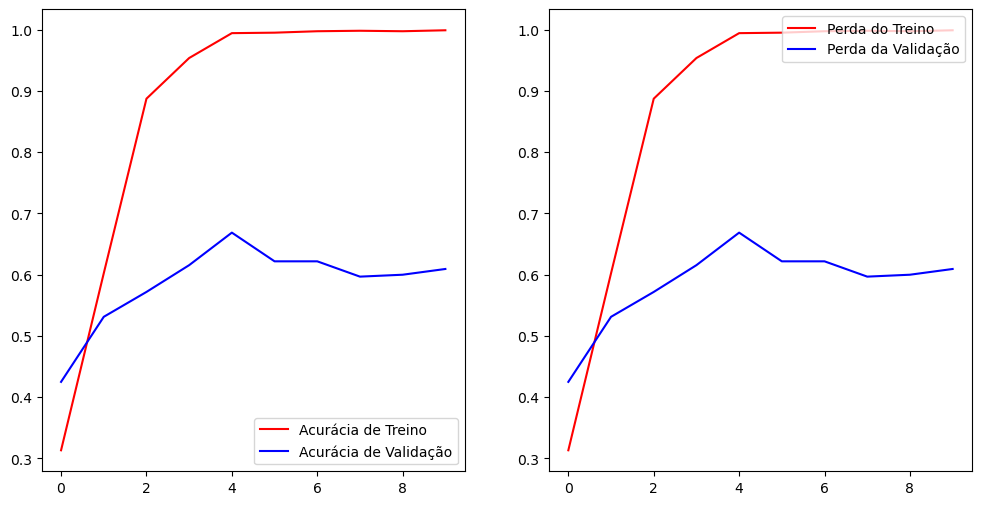

In [13]:
plot_resultados(history, epocas)

In [14]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get("accuracy")>=0.93):
            print("\n Alcançamos 93% de acuracia. Treino encerrado")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), 
    tf.keras.layers.Rescaling(1.255),
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)    
])
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas = 10
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas,
    callbacks=[callbacks]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 653ms/step - accuracy: 0.2768 - loss: 1203.4377 - val_accuracy: 0.3656 - val_loss: 1.3888
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 655ms/step - accuracy: 0.5538 - loss: 1.0311 - val_accuracy: 0.5219 - val_loss: 1.0230
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 654ms/step - accuracy: 0.8625 - loss: 0.5271 - val_accuracy: 0.7219 - val_loss: 0.7994
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9719 - loss: 0.1385
 Alcançamos 93% de acuracia. Treino encerrado
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 655ms/step - accuracy: 0.9723 - loss: 0.1364 - val_accuracy: 0.7437 - val_loss: 1.3577


In [27]:
data_augmentation= tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05)
])

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), 
    data_augmentation,
    tf.keras.layers.Rescaling(1.255),
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)    
])
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas = 50
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas,
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 698ms/step - accuracy: 0.2752 - loss: 1849.7697 - val_accuracy: 0.5875 - val_loss: 1.1176
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 699ms/step - accuracy: 0.5453 - loss: 1.0793 - val_accuracy: 0.6125 - val_loss: 0.9523
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 686ms/step - accuracy: 0.6492 - loss: 0.9377 - val_accuracy: 0.6812 - val_loss: 0.8604
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 678ms/step - accuracy: 0.7106 - loss: 0.8907 - val_accuracy: 0.7719 - val_loss: 0.5914
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 676ms/step - accuracy: 0.7637 - loss: 0.6216 - val_accuracy: 0.6656 - val_loss: 1.0913
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 675ms/step - accuracy: 0.7527 - loss: 0.6789 - val_accuracy: 0.7437 - val_loss: 0.7184
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 670ms/step - accuracy: 0.8176 - loss: 0.5135 - val_accuracy: 0.7688 - val_loss: 0.5712
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 652ms/step - accuracy: 0.8527 - loss: 0.4209 - val_a

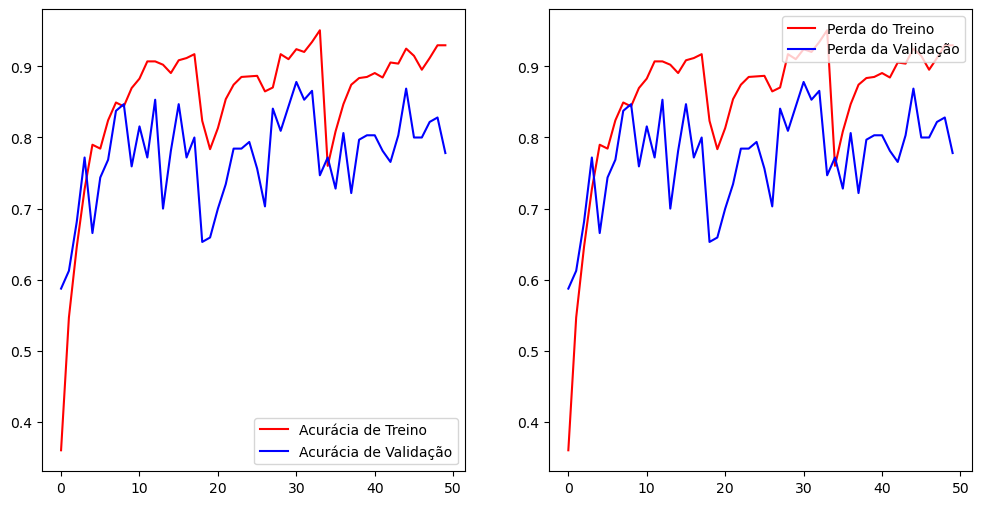

In [30]:
plot_resultados(history, epocas)

In [31]:
modelo.save("Modelo_aumento.h5")

In [ ]:
input_shape = (256, 256, 3)

In [33]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape,include_top=False,weights='imagenet')#Dowloand do modelo treinado

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
modelo_base.trainable = False

In [40]:
#rescalando pro nosso projeto
rescaling = tf.keras.layers.Rescaling((1./255))
treino = treino.map(lambda x, y: (rescaling(x), y))
validacao = validacao.map(lambda x, y: (rescaling(x), y))

In [ ]:
ultima_camada = modelo_base.get_layer('mixed7')
print("ultima_camada", ultima_camada.output)

ultima_camada <KerasTensor shape=(None, 14, 14, 768), dtype=float32, sparse=False, name=keras_tensor_292>


In [ ]:
ultima_camada = modelo_base.output
x = tf.keras.layers.Flatten()(ultima_camada)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
modelo = tf.keras.Model(inputs=modelo_base.input, outputs=x)

In [51]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
                    loss = 'sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [52]:
epocas = 20
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas,
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2322 - loss: 20.5585 - val_accuracy: 0.2562 - val_loss: 6.9336
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3683 - loss: 3.9025 - val_accuracy: 0.6031 - val_loss: 1.0123
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6100 - loss: 1.0407 - val_accuracy: 0.7344 - val_loss: 0.6815
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6814 - loss: 0.7941 - val_accuracy: 0.7937 - val_loss: 0.5752
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8181 - loss: 0.5456 - val_accuracy: 0.7875 - val_loss: 0.5577
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7979 - loss: 0.5468 - val_accuracy: 0.7906 - val_loss: 0.5693
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8042 - loss: 0.5481 - val_accuracy: 0.8469 - val_loss: 0.4638
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8278 - loss: 0.5035 - val_accuracy: 0.8250 - val_loss

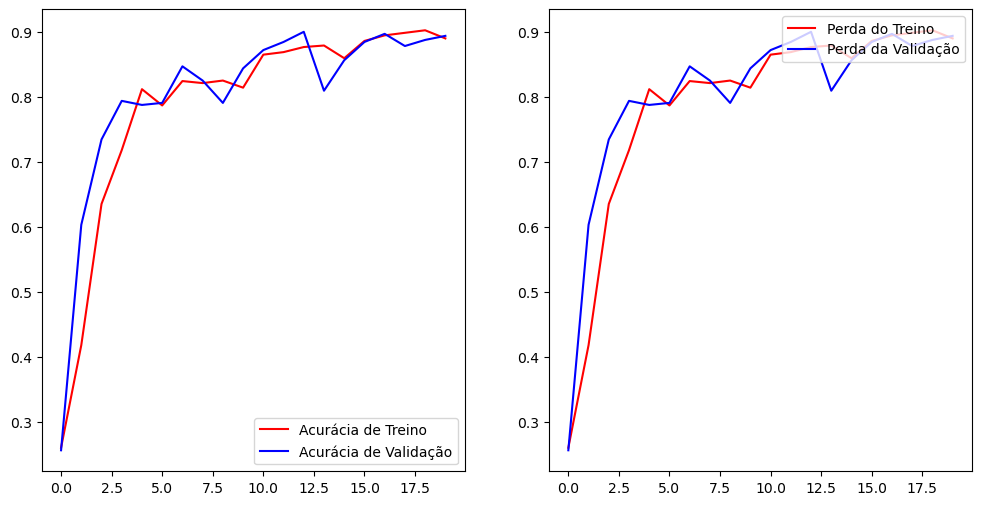

In [53]:
plot_resultados(history, epocas)

In [ ]:
modelo.save("Modelo_transferido_Sem_otmz.h5")

In [54]:
modelo.save("Modelo_transferido_final.h5", include_optimizer= False)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
modelo_tflite_quantizado = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Cr0l3y\AppData\Local\Temp\tmps5im19gj\assets


INFO:tensorflow:Assets written to: C:\Users\Cr0l3y\AppData\Local\Temp\tmps5im19gj\assets


Saved artifact at 'C:\Users\Cr0l3y\AppData\Local\Temp\tmps5im19gj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_64')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2733895909200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2733895908432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2733933871760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2733895909008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2733933872912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2733933872144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2733933873296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2733933873488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2733933874448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2733933871376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2

In [58]:
with open('modelo_quantizado16bits.tflite', 'wb') as f:
    f.write(modelo_tflite_quantizado)